In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
## Install Pandas Data Reader
!pip install pandas-datareader

In [3]:
import pandas_datareader as pdr
import pandas as pd
# A library that is needed for time series 
from datetime import datetime

In [4]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [5]:
df_tesla.head()
# We can see from today to past 5 years

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-08,23.318666,22.820000,23.266001,22.893333,48952500.0,22.893333
2017-09-11,24.247334,23.333332,23.423332,24.246000,115006500.0,24.246000
2017-09-12,24.584000,24.026667,24.299334,24.183332,89593500.0,24.183332
2017-09-13,24.538000,23.972668,24.254667,24.415333,62778000.0,24.415333
2017-09-14,25.197332,24.175333,24.288668,25.176001,108037500.0,25.176001


In [6]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-30,288.480011,272.649994,287.869995,277.700012,50541800.0,277.700012
2022-08-31,281.250000,271.809998,280.619995,275.609985,52107300.0,275.609985
2022-09-01,277.579987,266.149994,272.579987,277.160004,54287000.0,277.160004
2022-09-02,282.350006,269.079987,281.070007,270.209991,50752200.0,270.209991
2022-09-06,275.989990,265.739990,272.679993,274.420013,55762000.0,274.420013


<AxesSubplot:xlabel='Date'>

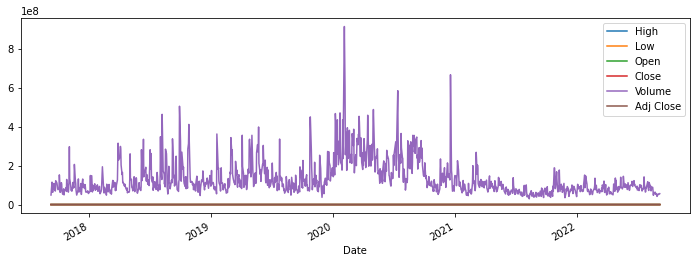

In [7]:
df_tesla.plot(figsize = (12,4))

<AxesSubplot:xlabel='Date'>

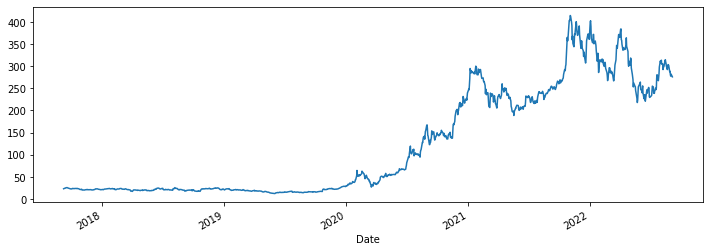

In [8]:
df_tesla['High'].plot(figsize = (12,4))

<AxesSubplot:xlabel='Date'>

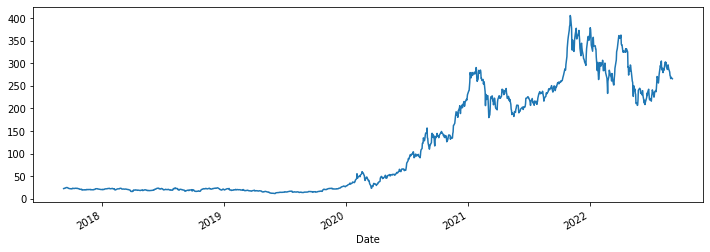

In [9]:
df_tesla['Low'].plot(figsize = (12,4))

<AxesSubplot:xlabel='Date'>

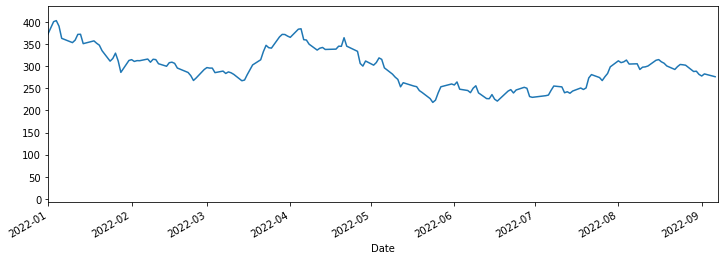

In [10]:
# xlimit and ylimit
df_tesla['High'].plot(xlim=['2022-01-01', '2022-09-07'] ,figsize = (12,4))

# xlimit and ylimit
# df_tesla['High'].plot(xlim=['2022-01-01', '2022-09-07'] ,ylim =[0,900], figsize = (12,4))

<AxesSubplot:xlabel='Date'>

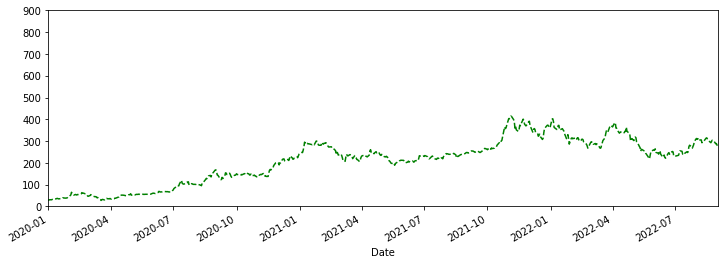

In [11]:
# xlimit and ylimit and coloring
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla['High'].plot(xlim=['2020-01-01', '2022-09-01'] ,ylim =[0,900], figsize = (12,4), ls ='--', c='green')

In [12]:
df_tesla.index

DatetimeIndex(['2017-09-08', '2017-09-11', '2017-09-12', '2017-09-13',
               '2017-09-14', '2017-09-15', '2017-09-18', '2017-09-19',
               '2017-09-20', '2017-09-21',
               ...
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-06'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [13]:
index = df_tesla.loc['2020-01-01':'2022-09-01'].index

In [14]:
share_open = df_tesla.loc['2020-01-01':'2022-09-01']['Open']

In [15]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2022-08-26    297.429993
2022-08-29    282.829987
2022-08-30    287.869995
2022-08-31    280.619995
2022-09-01    272.579987
Name: Open, Length: 673, dtype: float64

In [16]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=673, freq=None)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

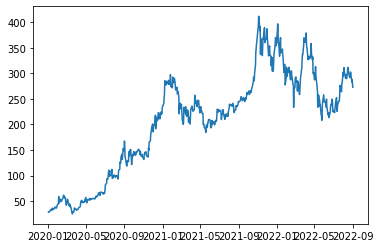

In [18]:
figure, axis = plt.subplots()
axis.plot(index, share_open)

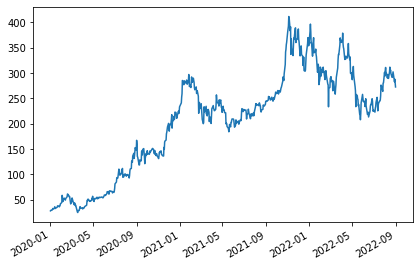

In [19]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [20]:
# Datetime index

In [21]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2017-09-08 to 2022-09-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1257 non-null   float64
 1   Low        1257 non-null   float64
 2   Open       1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Volume     1257 non-null   float64
 5   Adj Close  1257 non-null   float64
dtypes: float64(6)
memory usage: 101.0 KB


In [22]:
df_tesla = df_tesla.reset_index()

In [23]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1257 non-null   datetime64[ns]
 1   High       1257 non-null   float64       
 2   Low        1257 non-null   float64       
 3   Open       1257 non-null   float64       
 4   Close      1257 non-null   float64       
 5   Volume     1257 non-null   float64       
 6   Adj Close  1257 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [24]:
# Convert a date to dateime if it is a object
pd.to_datetime(df_tesla['Date'])

0      2017-09-08
1      2017-09-11
2      2017-09-12
3      2017-09-13
4      2017-09-14
          ...    
1252   2022-08-30
1253   2022-08-31
1254   2022-09-01
1255   2022-09-02
1256   2022-09-06
Name: Date, Length: 1257, dtype: datetime64[ns]

In [25]:
df_tesla = df_tesla.set_index('Date')

In [26]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-08,23.318666,22.820000,23.266001,22.893333,48952500.0,22.893333
2017-09-11,24.247334,23.333332,23.423332,24.246000,115006500.0,24.246000
2017-09-12,24.584000,24.026667,24.299334,24.183332,89593500.0,24.183332
2017-09-13,24.538000,23.972668,24.254667,24.415333,62778000.0,24.415333
2017-09-14,25.197332,24.175333,24.288668,25.176001,108037500.0,25.176001


In [27]:
## datetime
from datetime import datetime


In [28]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [29]:
datetime.now()

datetime.datetime(2022, 9, 7, 12, 29, 44, 696896)

In [30]:
def add_num(n1,n2):
    return n1+n2

start = datetime.now()
a= add_num(20,30)
end = datetime.now()
print(end-start)

0:00:00.000056


In [31]:
date = datetime(2022,11,21)
date

datetime.datetime(2022, 11, 21, 0, 0)

In [32]:
date.date()

datetime.date(2022, 11, 21)

In [33]:
date.day

21

In [34]:
date.weekday()

0

In [35]:
date.year

2022

In [36]:
date.month

11

**TIME RESAMPLING**

In [37]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-08,23.318666,22.820000,23.266001,22.893333,48952500.0,22.893333
2017-09-11,24.247334,23.333332,23.423332,24.246000,115006500.0,24.246000
2017-09-12,24.584000,24.026667,24.299334,24.183332,89593500.0,24.183332
2017-09-13,24.538000,23.972668,24.254667,24.415333,62778000.0,24.415333
2017-09-14,25.197332,24.175333,24.288668,25.176001,108037500.0,25.176001


In [38]:
df_tesla.resample(rule='A')

In [39]:
# Here we get for each year, which was the min High, min Low, min Open, min Close etc
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,20.297333,19.508667,19.966667,19.950666,48661500.0,19.950666
2018-12-31,17.355333,16.306000,16.851999,16.704000,46210500.0,16.704000
2019-12-31,12.445333,11.799333,12.073333,11.931333,36984000.0,11.931333
2020-12-31,26.990667,23.367332,24.980000,24.081333,52073100.0,24.081333
2021-12-31,188.736664,179.830002,184.183334,187.666672,29401800.0,187.666672
2022-12-31,217.973328,206.856674,207.949997,209.386673,41864700.0,209.386673


In [40]:
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,25.974001,25.178667,25.350000,25.666668,296871000.0,25.666668
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-31,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


<AxesSubplot:xlabel='Date'>

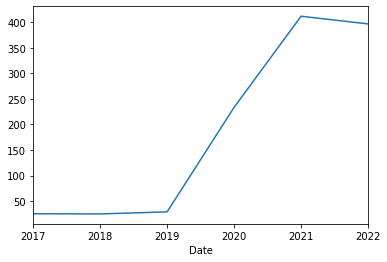

In [41]:
# Rule A means year end frequency
df_tesla.resample(rule='A').max()['Open'].plot()

[##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78](http://)

In [42]:
# Quaterly start frequency
df_tesla.resample(rule='QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-01,25.974001,25.178667,25.350000,25.666668,122391000.0,25.666668
2017-10-01,24.200001,23.608667,23.798668,23.976667,296871000.0,23.976667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-01,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-01,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667


<AxesSubplot:xlabel='Date'>

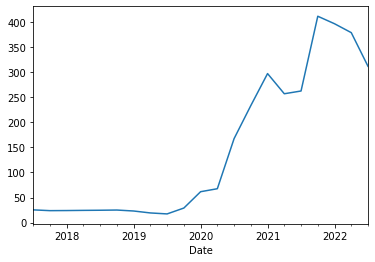

In [43]:
# Quaterly start frequency
df_tesla.resample(rule='QS').max()['Open'].plot()

In [44]:
# Business End frequency
df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,25.974001,25.178667,25.350000,25.666668,296871000.0,25.666668
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-30,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


<AxesSubplot:xlabel='Date'>

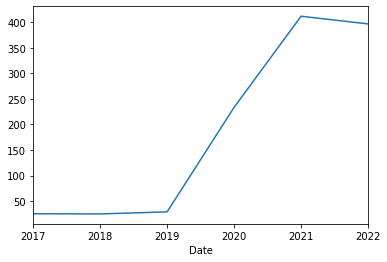

In [45]:
# Business End frequency
df_tesla.resample(rule='BA').max()['Open'].plot()

In [46]:
# Business Quarters
df_tesla.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-03,25.974001,25.178667,25.350000,25.666668,122391000.0,25.666668
2017-10-02,24.200001,23.608667,23.798668,23.976667,296871000.0,23.976667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-02,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-02,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667


<AxesSubplot:xlabel='Date'>

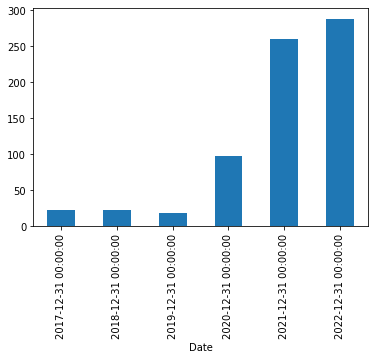

In [47]:
##plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

In [48]:
df_tesla['Open'].resample(rule='M').max()

Date
2017-09-30     25.350000
2017-10-31     23.798668
2017-11-30     22.150000
2017-12-31     22.993334
2018-01-31     24.000000
                 ...    
2022-05-31    313.006653
2022-06-30    251.720001
2022-07-31    280.700012
2022-08-31    311.666656
2022-09-30    281.070007
Freq: M, Name: Open, Length: 61, dtype: float64

<AxesSubplot:xlabel='Date'>

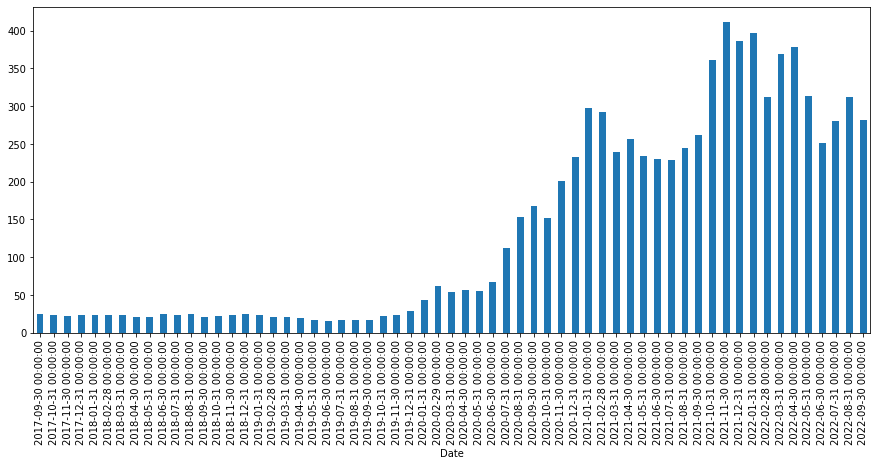

In [49]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [50]:
df_tesla['High'].rolling(11).max().head(20)

Date
2017-09-08          NaN
2017-09-11          NaN
2017-09-12          NaN
2017-09-13          NaN
2017-09-14          NaN
2017-09-15          NaN
2017-09-18          NaN
2017-09-19          NaN
2017-09-20          NaN
2017-09-21          NaN
2017-09-22    25.974001
2017-09-25    25.974001
2017-09-26    25.974001
2017-09-27    25.974001
2017-09-28    25.974001
2017-09-29    25.974001
2017-10-02    25.974001
2017-10-03    25.492666
2017-10-04    25.216667
2017-10-05    25.122000
Name: High, dtype: float64

In [51]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-08,23.318666,22.820000,23.266001,22.893333,48952500.0,22.893333
2017-09-11,24.247334,23.333332,23.423332,24.246000,115006500.0,24.246000
2017-09-12,24.584000,24.026667,24.299334,24.183332,89593500.0,24.183332
2017-09-13,24.538000,23.972668,24.254667,24.415333,62778000.0,24.415333
2017-09-14,25.197332,24.175333,24.288668,25.176001,108037500.0,25.176001


In [52]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [53]:
df_tesla.head(31)

,High,Low,Open,Close,Volume,Adj Close,Open:30 days rolling
Date,,,,,,,
2017-09-08,23.318666,22.820000,23.266001,22.893333,48952500.0,22.893333,NaN
2017-09-11,24.247334,23.333332,23.423332,24.246000,115006500.0,24.246000,NaN
2017-09-12,24.584000,24.026667,24.299334,24.183332,89593500.0,24.183332,NaN
2017-09-13,24.538000,23.972668,24.254667,24.415333,62778000.0,24.415333,NaN
2017-09-14,25.197332,24.175333,24.288668,25.176001,108037500.0,25.176001,NaN
2017-09-15,25.333332,24.846666,24.967333,25.320667,81307500.0,25.320667,NaN
2017-09-18,25.974001,25.178667,25.350000,25.666668,107820000.0,25.666668,NaN
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666,NaN
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334,NaN


<AxesSubplot:xlabel='Date'>

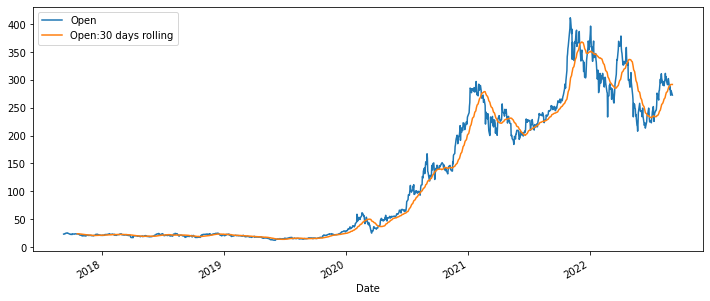

In [54]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))